In [0]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [0]:
#Read the Data File
df=pd.read_csv(r"C:\Users\Sanjeev\Downloads\Country-data.csv")

In [0]:
#Check the Data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [0]:
#Check for the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


- Here we can see that there are no null values in dataframe.
- Now lets's check for outliers

In [0]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### defference in 75% and Max is so high in child_mort, exports, health,imports, income, inflation, total_fer and gdpp.

### Let's check them for more smaller range.

In [0]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


### here we can see that there is big difference in 95% to  99% and 99% to  Max for some columns
### Let's first do the PCA and then we can go for the outliers

### Data Scaling
#### Before doinf the PCA we need to scale the data
#### Let's import the StandardScaler and scale the data

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop(['country'],axis=1)
x = scaler.fit_transform(X)

H:\Data_Science\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
H:\Data_Science\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
y=df['country']

In [0]:
x[:5,:5]

array([[ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ],
       [-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ],
       [-0.27283273, -0.09912164, -0.96607302, -0.64176233, -0.22084447],
       [ 2.00780766,  0.77538117, -1.44807093, -0.16531531, -0.58504345],
       [-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177]])

### Now let's import the PCA and apply on the scaled data

In [0]:
from sklearn.decomposition import PCA
pca = PCA(random_state=92)
pca.fit(x)
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [0]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

#### Let's plot the variance and check the variance explained by the PCA components 

<BarContainer object of 9 artists>

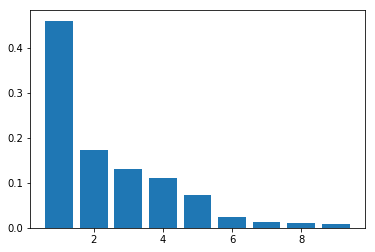

In [0]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [0]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Making the scree plot

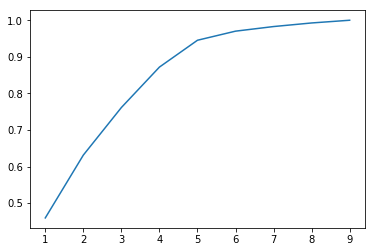

In [0]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

#### Here we can see that:- 
 - 3 components explain 76% variance
 - 4 components explain 87% variance
 - 5 components explain 94% variance
 
 Let's consider 5 components and proceed further 

In [0]:
pca_n = PCA(n_components=5, random_state=92)
newdata = pca_n.fit_transform(x)
newdata.shape

(167, 5)

In [0]:
df_pca = pd.DataFrame(newdata, columns=["PC1", "PC2","PC3","PC4","PC5"])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


In [0]:
#Add the Country Columns to the df_pca
df_pca1 = pd.concat([df_pca, y], axis=1)
df_pca1.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda


 - Now we have the Principal components. 
 - Before moving for the Clustering let's check for the Outliers
 

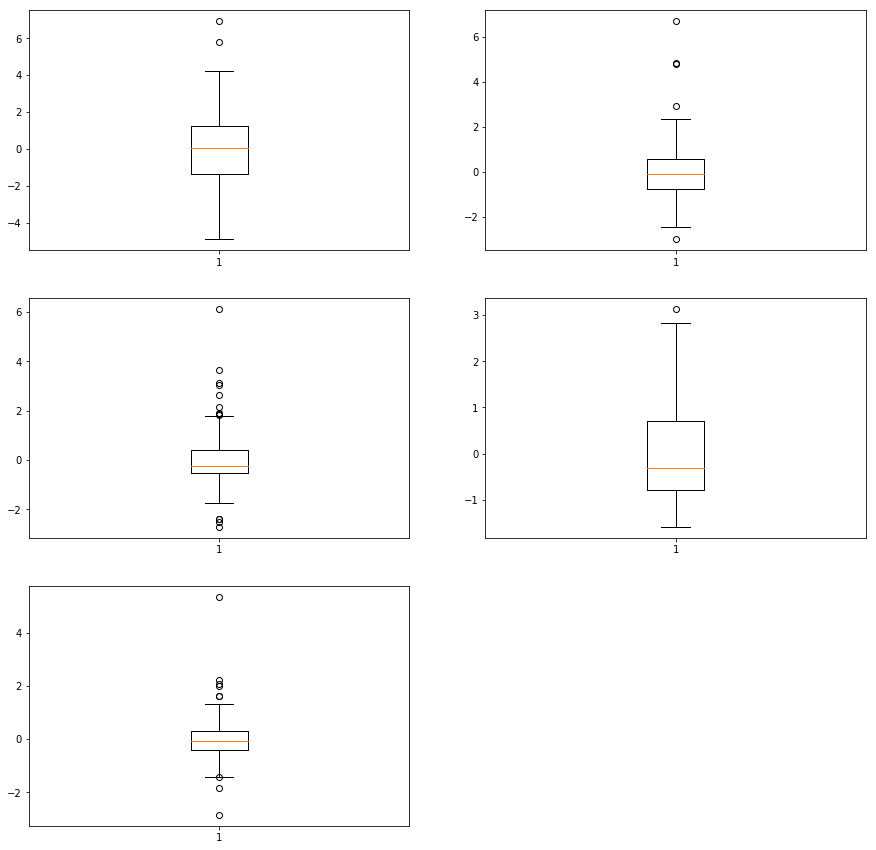

In [0]:
plt.figure(figsize=[15,15])
plt.subplot(3,2,1)
plt.boxplot(df_pca1.PC1)
plt.subplot(3,2,2)
plt.boxplot(df_pca1.PC2)
plt.subplot(3,2,3)
plt.boxplot(df_pca1.PC3)
plt.subplot(3,2,4)
plt.boxplot(df_pca1.PC4)
plt.subplot(3,2,5)
plt.boxplot(df_pca1.PC5)
plt.show()

In [0]:
# Outlier treatment
#For PC1
Q1 = df_pca1.PC1.quantile(0.05)
Q3 = df_pca1.PC1.quantile(0.95)
IQR = Q3 - Q1
df_pca1 = df_pca1[(df_pca1.PC1 >= Q1 - 1.5*IQR) & (df_pca1.PC1 <= Q3 + 1.5*IQR)]
#For PC2
Q1 = df_pca1.PC2.quantile(0.05)
Q3 = df_pca1.PC2.quantile(0.95)
IQR = Q3 - Q1
df_pca1 = df_pca1[(df_pca1.PC2 >= Q1 - 1.5*IQR) & (df_pca1.PC2 <= Q3 + 1.5*IQR)]
#For PC3
Q1 = df_pca1.PC3.quantile(0.05)
Q3 = df_pca1.PC3.quantile(0.95)
IQR = Q3 - Q1
df_pca1 = df_pca1[(df_pca1.PC3 >= Q3 - 1.5*IQR) & (df_pca1.PC3 <= Q3 + 1.5*IQR)]
#For PC4
Q1 = df_pca1.PC4.quantile(0.05)
Q3 = df_pca1.PC4.quantile(0.95)
IQR = Q3 - Q1
df_pca1 = df_pca1[(df_pca1.PC4 >= Q1 - 1.5*IQR) & (df_pca1.PC4 <= Q3 + 1.5*IQR)]
#For PC5
Q1 = df_pca1.PC5.quantile(0.05)
Q3 = df_pca1.PC5.quantile(0.95)
IQR = Q3 - Q1
df_pca1 = df_pca1[(df_pca1.PC5 >= Q1 - 1.5*IQR) & (df_pca1.PC5 <= Q3 + 1.5*IQR)]

In [0]:
df_pca1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 166
Data columns (total 6 columns):
PC1        166 non-null float64
PC2        166 non-null float64
PC3        166 non-null float64
PC4        166 non-null float64
PC5        166 non-null float64
country    166 non-null object
dtypes: float64(5), object(1)
memory usage: 9.1+ KB


#### We removed the outliers with standrad statistical outlier method i.e. IQR*1.5 and there is only one row(Country) has been removed
 - Now let's proceed further and create cluster

 -  Let's visualise the data before moving further

H:\Data_Science\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


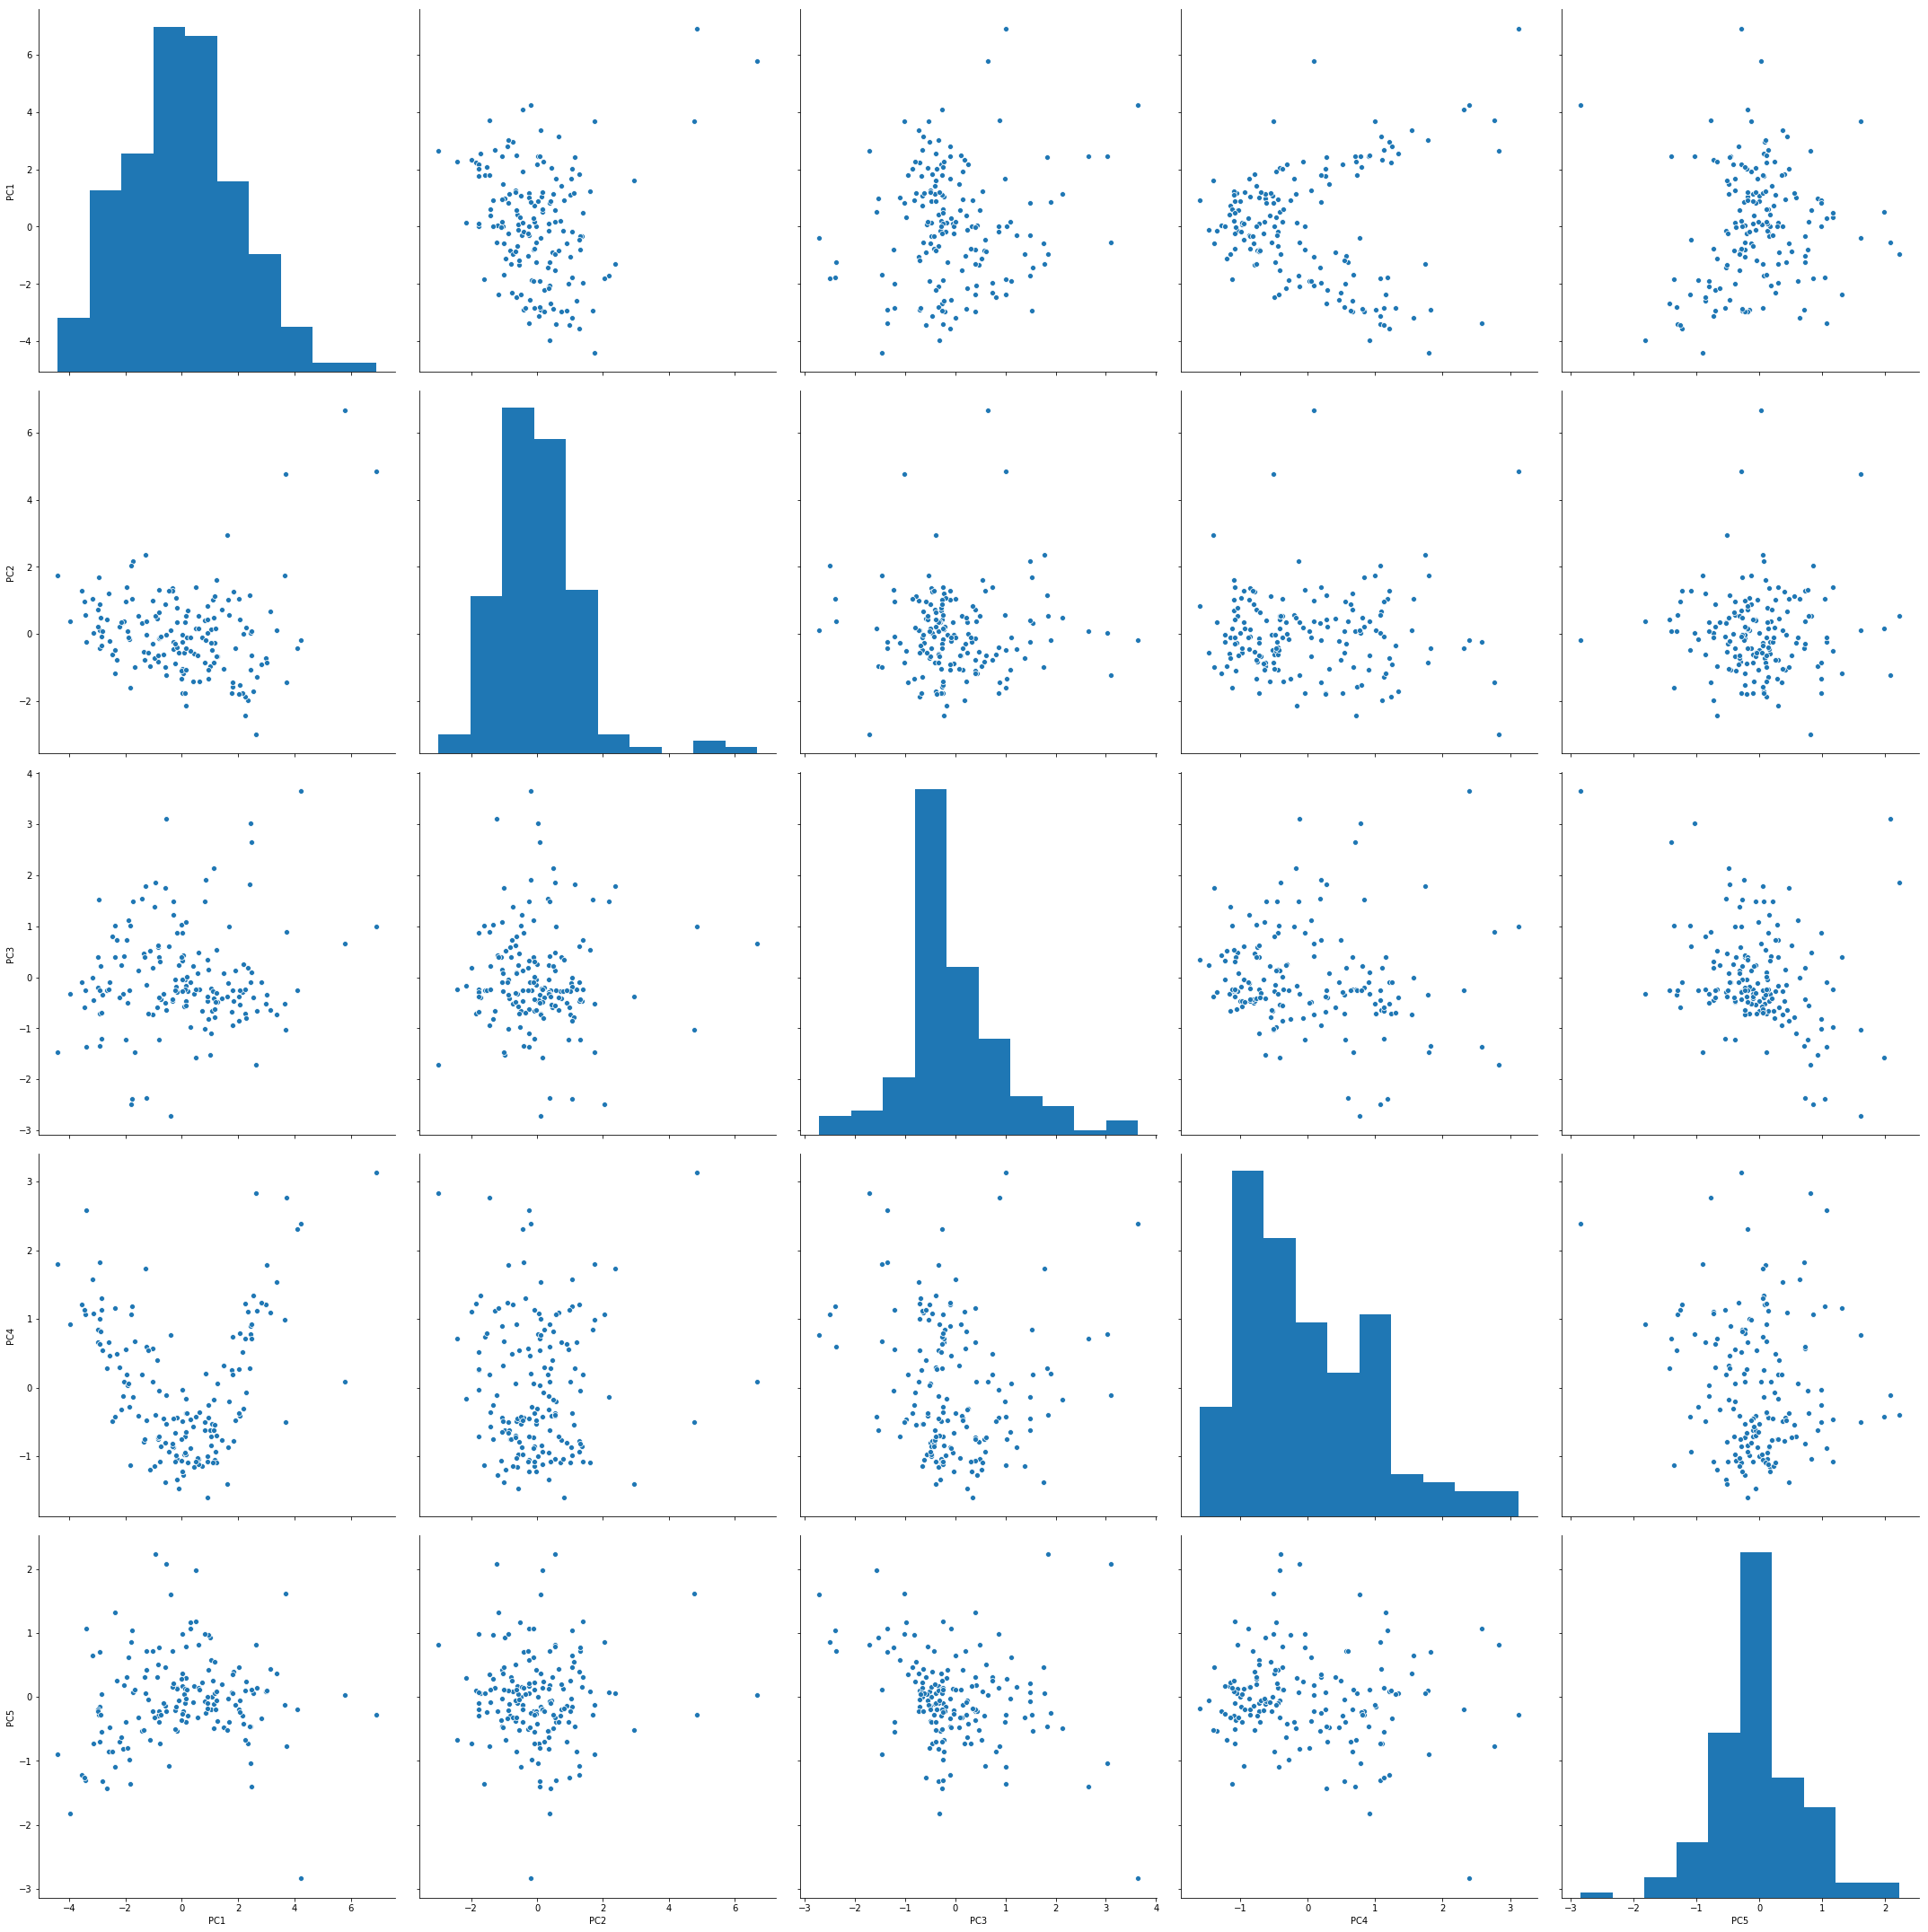

In [0]:
df_final=df_pca1.drop(['country'],axis=1)
sns.pairplot(data=df_final, size=6)

# Clustering

In [0]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [0]:
#Let's check the Hopkins measure
hopkins(df_final)

0.8111113972598782

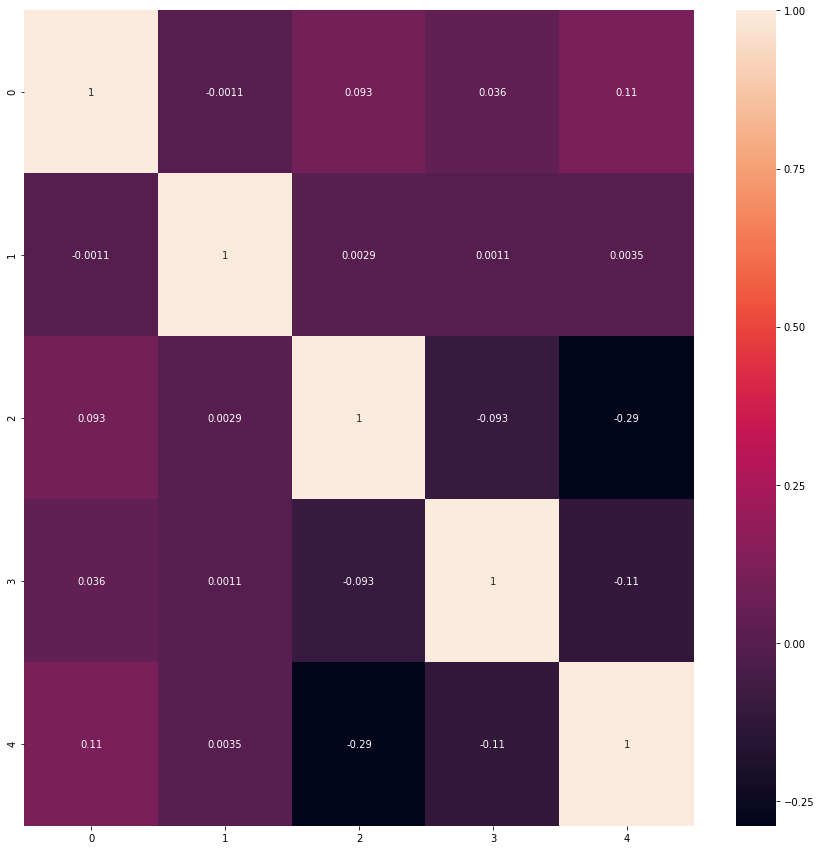

In [0]:
#Check the correlation between the Components
corrmat = np.corrcoef(df_final.transpose())
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

 - maximum correlation between components is 0.11 which is very low

K-Means algorithm 

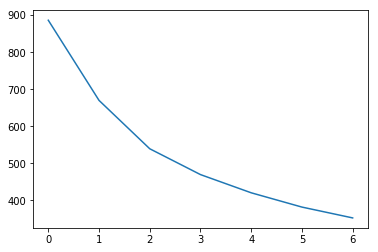

In [0]:
# Ploting the Elbow curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,  random_state = 84)
    kmeans.fit(df_final)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [0]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,  random_state = 84 )
    kmeans.fit(df_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3048241475624547
For n_clusters=3, the silhouette score is 0.31390186124632413
For n_clusters=4, the silhouette score is 0.3286192691054444
For n_clusters=5, the silhouette score is 0.264945114213122
For n_clusters=6, the silhouette score is 0.2768790664673189
For n_clusters=7, the silhouette score is 0.26952781127284425
For n_clusters=8, the silhouette score is 0.2370742683250707


 - Based on the silhouette score and the Elbow curve we can conclud that 4 clusters are optimum.

## Creating Model the Using K-Means 


In [0]:
# k-means with some arbitrary k
df_kmeans=df_final
kmeans = KMeans(n_clusters=4, max_iter=50, random_state = 84)
kmeans.fit(df_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=84, tol=0.0001, verbose=0)

In [0]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       3, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [0]:
# assign the label
df_final['cluster_id'] = kmeans.labels_
df_final.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,1
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,2
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,2
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,1
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,2


In [0]:
df_final2 = pd.concat([df_final, y], axis=1)
df_final2.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,1.0,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,2.0,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,2.0,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,1.0,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,2.0,Antigua and Barbuda


In [0]:
df_final2['cluster_id'].value_counts()

2.0    86
1.0    45
0.0    32
3.0     3
Name: cluster_id, dtype: int64

H:\Data_Science\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
H:\Data_Science\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


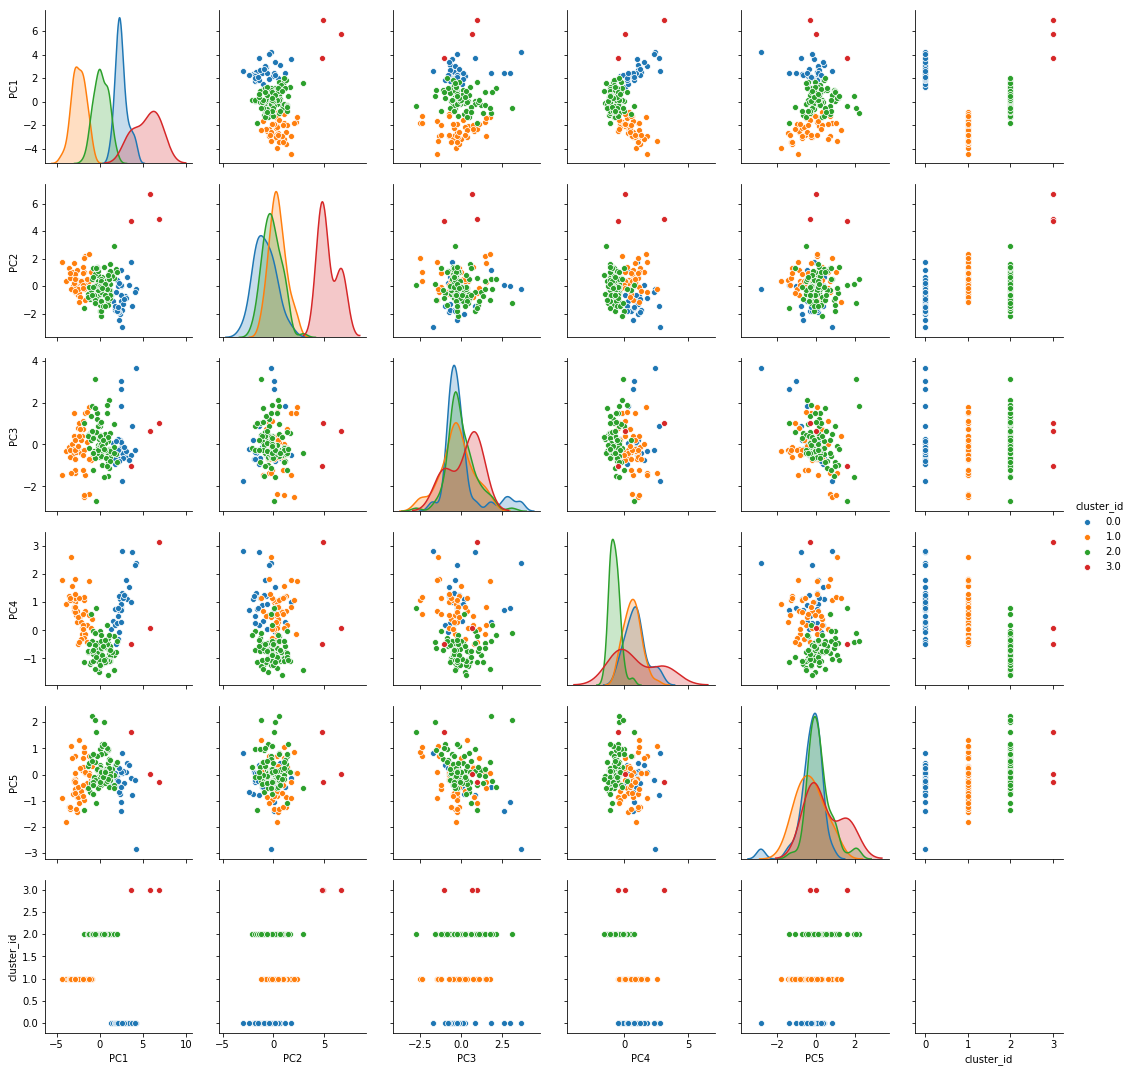

In [0]:
sns.pairplot(hue='cluster_id',data=df_final2)

In [0]:
# Let's merge the original data with the data(ClusterID)
data=pd.merge(df,df_final2, how = 'inner', on= 'country')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913025,0.095621,-0.718118,1.005255,-0.158310,1.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429911,-0.588156,-0.333486,-1.161059,0.174677,2.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285225,-0.455174,1.221505,-0.868115,0.156475,2.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932423,1.695555,1.525044,0.839625,-0.273209,1.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033576,0.136659,-0.225721,-0.847063,-0.193007,2.0


In [0]:
# Let's drop PCs from the data
data1=data.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2.0


## Analysis of the clusters

In [0]:
# Let's profile the cluster by taking the mean of various attributes
clu_child = pd.DataFrame(data1.groupby(["cluster_id"]).child_mort.mean())
clu_health= pd.DataFrame(data1.groupby(["cluster_id"]).health.mean())
clu_imports = pd.DataFrame(data1.groupby(["cluster_id"]).imports.mean())
clu_exports = pd.DataFrame(data1.groupby(["cluster_id"]).exports.mean())
clu_inflation = pd.DataFrame(data1.groupby(["cluster_id"]).inflation.mean())
clu_gdpp = pd.DataFrame(data1.groupby(["cluster_id"]).gdpp.mean())
clu_total_fer = pd.DataFrame(data1.groupby(["cluster_id"]).total_fer.mean())
clu_life_expec = pd.DataFrame(data1.groupby(["cluster_id"]).life_expec.mean())

In [0]:
# Let's concat the resultant with the Cluster ID columns
df2= pd.concat([pd.Series([0,1,2,3]),clu_child,clu_health,clu_imports,clu_exports,clu_inflation,clu_gdpp,clu_total_fer,clu_life_expec], axis=1)
#Add column names
df2.columns = ["cluster_id","child_mort","health","imports","exports","inflation","gdpp","total_fer","life_expec"]
df2

,cluster_id,child_mort,health,imports,exports,inflation,gdpp,total_fer,life_expec
0,0,5.181250,9.088437,40.584375,46.118750,2.513844,42118.750000,1.788438,80.081250
1,1,93.384444,6.372889,43.060000,29.009111,9.873889,1856.044444,4.999556,58.980000
2,2,21.867442,6.222791,47.754255,41.054523,7.713884,6496.069767,2.326977,72.805814
3,3,4.133333,6.793333,156.666667,176.000000,2.468000,57566.666667,1.380000,81.433333


Form the above df we can see that cluster(1) is the one which represents the countries which are in dire need of the aid. As there child_mort and inflation is high, import, exports, life_expec and gdpp is very low.
Now Let's add the check for the which was removed during outlier.

In [0]:
data1[data1['cluster_id'].isnull()]

Here we can see that 'Nigeria' country which was removed during the outlier treatment is fall in the cluster (1) as per the values. Let's Update it's cluster_id

In [0]:
data1[data1['cluster_id'].isnull()]=1

In [0]:
#Let's find the list of countries which needs aid on priority
data1[data1['cluster_id']==1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108     

data1.info()

In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 11 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
cluster_id    166 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 15.7+ KB


## Hierarchical Clustering

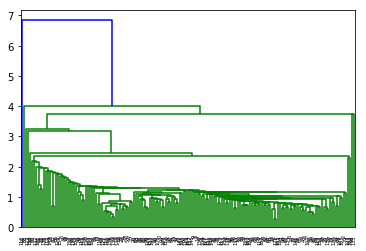

In [0]:
# single linkage
mergings_s = linkage(x, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

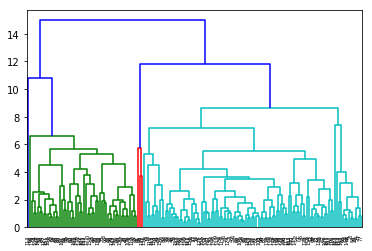

In [0]:
# complete linkage
mergings_c = linkage(x, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

In [0]:
# 4 clusters
cluster_labels = cut_tree(mergings_s, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
# 4 clusters
cluster_labels = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

 - In single linkage maximum countries are in one cluster. So we will go with complete linkage
 

In [0]:
# assign cluster labels
X['cluster_labels'] = cluster_labels
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [0]:
df_finalH = pd.concat([X, y], axis=1)
df_finalH.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Afghanistan
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,Albania
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,Algeria
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Angola
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,Antigua and Barbuda


In [0]:
#Let's find the list of countries which needs aid on priority
df_finalH[df_finalH['cluster_labels']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
18                       Bhutan
21                     Botswana
25                 Burkina Faso
26                      Burundi
27                     Cambodia
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
52                         Fiji
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
65                       Guyana
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
83              Kyrgyz Republic
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94      

## Here we find the same result using K-Means and Hierarchical Clustering.